In [24]:
import folium
import os
import pandas as pd
import scipy.stats

processed_data_dir = os.getcwd().replace('/notebooks', '') + '/data/processed'
test_set_df = pd.read_csv("{}/full_test_dataset.csv".format(processed_data_dir))

# this assumes same distribution of the school took the test. 
# Probably not exactly accurate, but absent more granular data, it will have to do
test_set_df["predicted_testtakers_all"] = test_set_df["predicted_perc_testtakers"].astype(float) * test_set_df["grade_8_2017_enrollment"].astype(float)
test_set_df["predicted_testtakers_black_hispanic"] = test_set_df["predicted_testtakers_all"].astype(float) * test_set_df["Percent Black / Hispanic"].astype(float)
test_set_df["predicted_testtakers_below_poverty_lvl"] = test_set_df["predicted_testtakers_all"].astype(float) * test_set_df["pct_poverty_2017_val"].astype(float)
test_set_df["actual_testtakers_black_hispanic"] = test_set_df["num_testtakers"].astype(float) * test_set_df["Percent Black / Hispanic"].astype(float)
test_set_df["actual_testtakers_below_poverty_lvl"] = test_set_df["num_testtakers"].astype(float) * test_set_df["pct_poverty_2017_val"].astype(float)
test_set_df["diff_num_testtakers_all"] =  test_set_df["predicted_testtakers_all"] - test_set_df["num_testtakers"]
test_set_df["diff_num_testtakers_black_hispanic"] = test_set_df["predicted_testtakers_black_hispanic"] - test_set_df["actual_testtakers_black_hispanic"] 
test_set_df["diff_num_testtakers_below_poverty_lvl"] = test_set_df["predicted_testtakers_below_poverty_lvl"] - test_set_df["actual_testtakers_below_poverty_lvl"] 
test_set_df["percentile_diff_num_testtakers_all"] = test_set_df.apply(lambda row: float(scipy.stats.percentileofscore(test_set_df["diff_num_testtakers_all"], row["diff_num_testtakers_all"])) / float(100), axis=1)
test_set_df["percentile_diff_num_black_hispanic"] = test_set_df.apply(lambda row: float(scipy.stats.percentileofscore(test_set_df["diff_num_testtakers_black_hispanic"], row["diff_num_testtakers_black_hispanic"])) / float(100), axis=1)
test_set_df["percentile_diff_num_below_poverty_lvl"] = test_set_df.apply(lambda row: float(scipy.stats.percentileofscore(test_set_df["diff_num_testtakers_black_hispanic"], row["diff_num_testtakers_below_poverty_lvl"])) / float(100), axis=1)

new_int_cols = ["predicted_testtakers_all", "predicted_testtakers_black_hispanic", \
    "predicted_testtakers_below_poverty_lvl", "actual_testtakers_black_hispanic", \
    "actual_testtakers_below_poverty_lvl", "diff_num_testtakers_all", \
    "diff_num_testtakers_black_hispanic", "diff_num_testtakers_below_poverty_lvl"
] 
test_set_df[new_int_cols] = test_set_df[new_int_cols].astype(int)
test_set_df

,school_name,dbn,Longitude,Latitude,perc_testtakers,num_testtakers,grade_8_2017_enrollment,pct_poverty_2017_val,Percent Black / Hispanic,predicted_perc_testtakers,...,predicted_testtakers_black_hispanic,predicted_testtakers_below_poverty_lvl,actual_testtakers_black_hispanic,actual_testtakers_below_poverty_lvl,diff_num_testtakers_all,diff_num_testtakers_black_hispanic,diff_num_testtakers_below_poverty_lvl,percentile_diff_num_testtakers_all,percentile_diff_num_black_hispanic,percentile_diff_num_below_poverty_lvl
0,J.H.S. 052 INWOOD,06M052,-73.925157,40.865914,0.087838,13.0,148.0,0.352,0.97,0.185119,...,26,9,12,4,14,13,5,0.884956,0.923894,0.746903
1,BRONX WRITING ACADEMY,09X323,-73.914142,40.832278,0.194631,29.0,149.0,0.464,0.95,0.102269,...,14,7,27,13,-13,-13,-6,0.145133,0.093805,0.223009
2,P.S. 034 FRANKLIN D. ROOSEVELT,01M034,-73.975043,40.726147,0.096774,6.0,62.0,0.529,0.92,0.198330,...,11,6,5,3,6,5,3,0.702655,0.769912,0.672566
3,I.S. 145 JOSEPH PULITZER,30Q145,-73.887594,40.754326,0.197691,137.0,693.0,0.219,0.90,0.285876,...,178,43,123,30,61,55,13,0.994690,0.998230,0.913274
4,P.S./I.S. 295,29Q295,-73.731394,40.720730,0.450000,27.0,60.0,0.107,0.53,0.350074,...,11,2,14,2,-5,-3,0,0.300885,0.322124,0.426549
5,CORONA ARTS AND SCIENCES ACADEMY,24Q311,-73.871482,40.743204,0.133333,16.0,120.0,0.247,0.95,0.290181,...,33,8,15,3,18,17,4,0.920354,0.952212,0.727434
6,COMPREHENSIVE MODEL SCHOOL PROJECT M.S. 327,09X327,-73.916384,40.842811,0.153061,15.0,98.0,0.458,0.99,0.379584,...,36,17,14,6,22,21,10,0.939823,0.973451,0.861947
7,HARBOR SCIENCE AND ARTS CHARTER SCHOOL,84M704,-73.944526,40.795537,0.184211,7.0,38.0,0.375,0.93,0.262868,...,9,3,6,2,2,2,1,0.598230,0.631858,0.529204
8,P.S./M.S. 147 RONALD MCNAIR,29Q147,-73.740151,40.698026,0.130435,9.0,69.0,0.092,0.97,0.104448,...,6,0,8,0,-1,-1,0,0.405310,0.389381,0.444248
9,P.S./I.S. 208,29Q208,-73.727581,40.744184,0.329412,28.0,85.0,0.106,0.87,0.352318,...,26,3,24,2,1,1,0,0.555752,0.568142,0.461947


In [25]:
start_long = test_set_df["Longitude"].mean()
start_lat = test_set_df["Latitude"].mean()
nyc_map = folium.Map(location=[start_lat, start_long],
    tiles='Stamen Toner',
    zoom_start=10)

# for idx, row in test_set_df.iterrows():
# #     if row["diff_num_testtakers_all"] > 0:
#     school_lat = row["Latitude"]
#     school_long = row["Longitude"]
#     school_name = row["school_name"]
#     num_testtakers = row["diff_num_testtakers_all"]
#     r = row["percentile_diff_num_testtakers_all"] * 20
#     folium.CircleMarker(radius = r , location=[school_lat,school_long], color='#3186cc').add_to(nyc_map)


/Users/gbolla/.local/share/virtualenvs/kaggle-passnyc-EVtxURMB/lib/python3.7/site-packages/matplotlib/collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


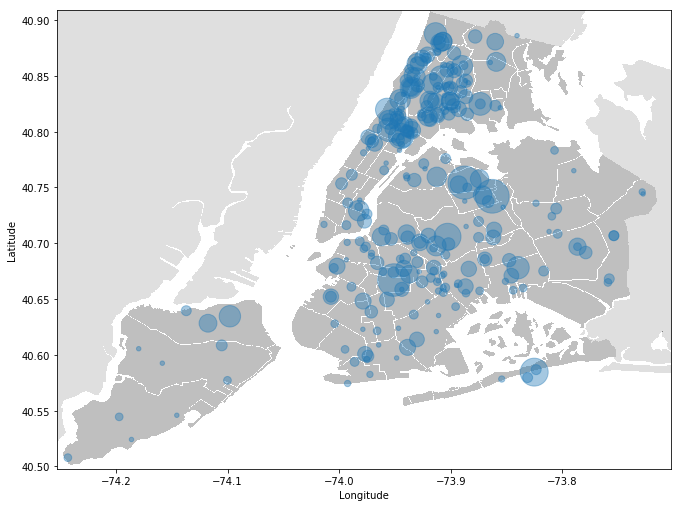

In [90]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nyc_img=mpimg.imread('/Users/gbolla/Desktop/personal-git-projects/kaggle-passnyc/src/neighbourhoods_new_york_city_map.png')
test_set_df.plot(kind="scatter", 
    x="Longitude", 
    y="Latitude", 
    #c=test_set_df["percentile_diff_num_testtakers_all"].astype(float) * 50, 
    s=test_set_df["diff_num_testtakers_black_hispanic"].astype(float) * 20, 
    #cmap=plt.get_cmap("jet"), 
    #colorbar=True,
    figsize=(11,10),
    alpha=0.4           
                )
plt.imshow(nyc_img, 
           #extent=[test_set_df["Longitude"].min(), test_set_df["Longitude"].max(), test_set_df["Latitude"].min(), test_set_df["Latitude"].max()], 
           extent=[test_set_df["Longitude"].min() - .01 , test_set_df["Longitude"].max() + .01, test_set_df["Latitude"].min() - .01, test_set_df["Latitude"].max() + .01]
           ,alpha = 0.5)
plt.show()


/Users/gbolla/.local/share/virtualenvs/kaggle-passnyc-EVtxURMB/lib/python3.7/site-packages/matplotlib/collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


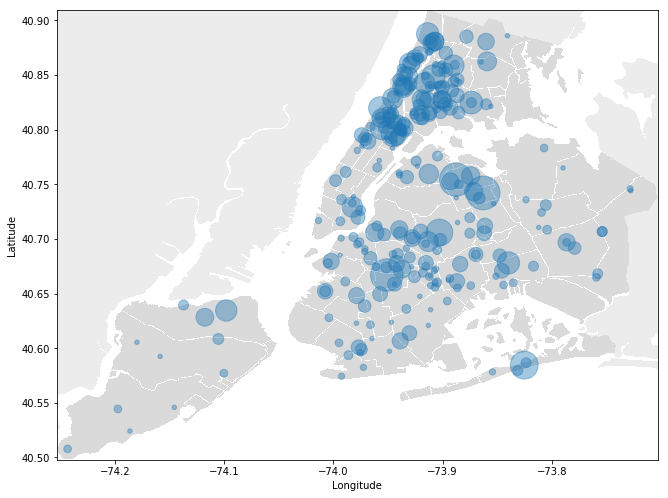

In [93]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nyc_img=mpimg.imread('/Users/gbolla/Desktop/personal-git-projects/kaggle-passnyc/src/cropped_neighbourhoods_new_york_city_map.png')
test_set_df.plot(kind="scatter", 
    x="Longitude", 
    y="Latitude", 
    #c=test_set_df["percentile_diff_num_testtakers_all"].astype(float) * 50, 
    s=test_set_df["diff_num_testtakers_black_hispanic"].astype(float) * 20, 
    #cmap=plt.get_cmap("jet"), 
    #colorbar=True,
    figsize=(10.77,10),
    alpha=0.4           
                )
plt.imshow(nyc_img, 
           extent=[test_set_df["Longitude"].min() - .01 , test_set_df["Longitude"].max() + .01, test_set_df["Latitude"].min() - .01, test_set_df["Latitude"].max() + .01], 
           alpha = 0.25)
plt.show()